In [84]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [85]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [86]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    item = item + "_StackedIndices"
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i_StackedIndices',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_StackedIndices',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_new_StackedIndices']

In [87]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[0] + "\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[2] + "\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson,FRic,FEve,FDiv
0,FOR01,1.75,0,0.519860,0.375000,0.000000,0.000000,0.000000
1,FOR02,1.00,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,FOR03,0.00,0,0.000000,1.000000,0.000000,0.000000,0.000000
3,FOR04,4.35,0,1.281204,0.695360,0.000011,0.705540,0.678880
4,FOR05,3.95,0,1.076584,0.593651,0.000012,0.760142,0.665207


In [88]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,1.75,0.519860,0.375000,4.85,1.190772,0.606250
1,FOR02,1.00,0.000000,0.000000,4.25,1.164679,0.622049
2,FOR03,0.00,0.000000,1.000000,3.85,1.166316,0.650926
3,FOR04,4.35,1.281204,0.695360,5.00,1.436405,0.739520
4,FOR05,3.95,1.076584,0.593651,3.30,0.753127,0.416553


In [89]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,1.75,0.519860,0.375000,4.85,1.190772,0.606250
1,FOR02,1.00,0.000000,0.000000,4.25,1.164679,0.622049
2,FOR03,0.00,0.000000,1.000000,3.85,1.166316,0.650926
3,FOR04,4.35,1.281204,0.695360,5.00,1.436405,0.739520
4,FOR05,3.95,1.076584,0.593651,3.30,0.753127,0.416553


In [90]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [91]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,2.10,0.568426,0.358333,3.40,0.935210,0.54208,Prunus
59,FOR79,4.00,1.174565,0.645920,5.80,1.207396,0.58288,Mixed deciduous
60,FOR80,3.05,0.877943,0.514880,4.80,1.297885,0.68368,Mixed deciduous
61,FOR81,4.35,1.038922,0.547840,5.35,1.304865,0.65712,Mixed deciduous
62,FOR82,4.20,0.943703,0.512160,3.95,1.025488,0.57200,Mixed deciduous


## Species Richness

In [92]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [93]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [94]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,1.75,4.85
1,FOR02,7,Prunus,1.00,4.25
2,FOR03,4,Prunus,0.00,3.85
3,FOR04,2,Oak_open_canopy,4.35,5.00
4,FOR05,1,Oak_open_canopy,3.95,3.30


In [95]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,3.673810,3.966667
std,1.865415,1.696269,1.389012
min,1.000000,0.000000,0.000000
25%,2.000000,2.625000,3.250000
50%,3.000000,3.250000,3.850000
75%,4.000000,4.375000,4.800000
max,8.000000,9.300000,7.300000


In [96]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,2.00,3.10
19,FOR20,3,Alder,4.20,3.30
35,FOR55,2,Alder,2.50,2.60
7,FOR08,4,Alder,3.15,1.30
36,FOR56,2,Alder,1.70,0.00
...,...,...,...,...,...
24,FOR25,1,Pine,8.00,6.80
30,FOR31,2,Pine,4.05,6.25
58,FOR78,2,Prunus,2.10,3.40
2,FOR03,4,Prunus,0.00,3.85


In [97]:
df_Richness_1_Asso_NoZero = df_Richness_1_Asso.copy()
df_Richness_1_Asso_NoZero = df_Richness_1_Asso_NoZero[df_Richness_1_Asso_NoZero['Raster Species Richness June'] != 0]
df_Richness_1_Asso_NoZero = df_Richness_1_Asso_NoZero[df_Richness_1_Asso_NoZero['Raster Species Richness Sep'] != 0]
df_Richness_1_Asso_NoZero.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,61.000000,61.000000,61.000000
mean,3.524590,3.766393,4.033607
std,1.885087,1.635434,1.314018
min,1.000000,1.000000,1.300000
25%,2.000000,2.650000,3.300000
50%,3.000000,3.300000,3.900000
75%,4.000000,4.400000,4.800000
max,8.000000,9.300000,7.300000


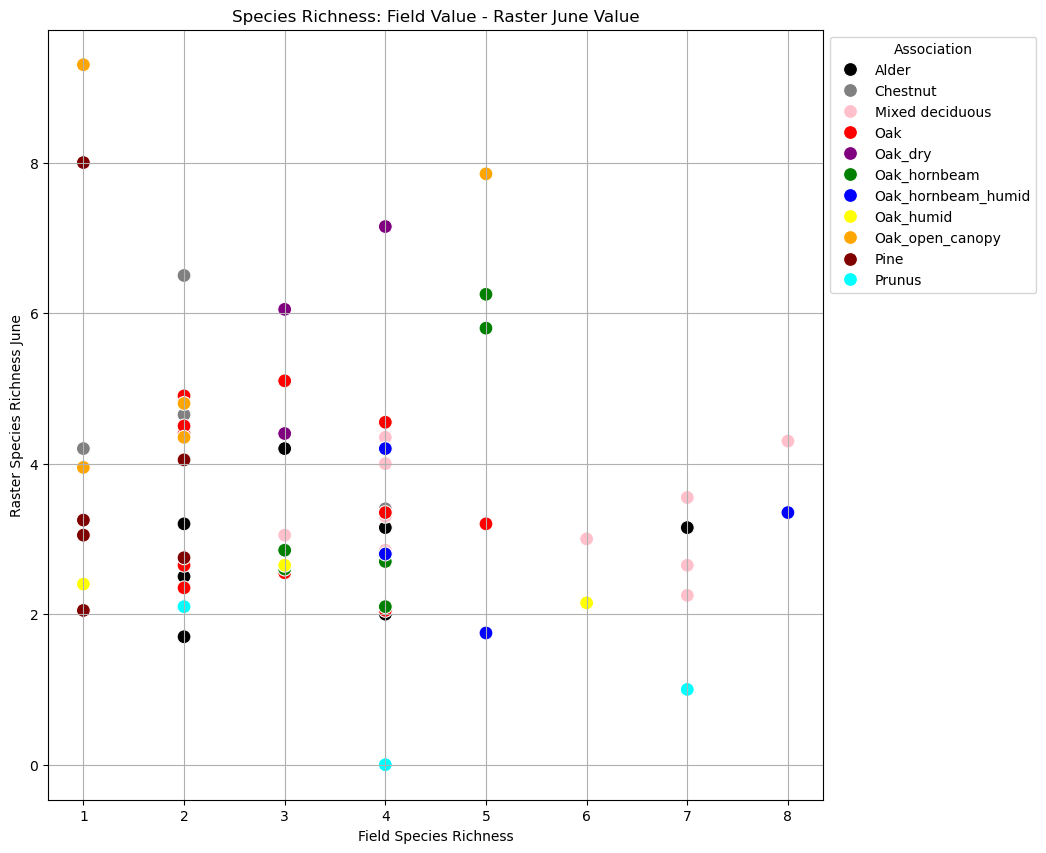

In [98]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

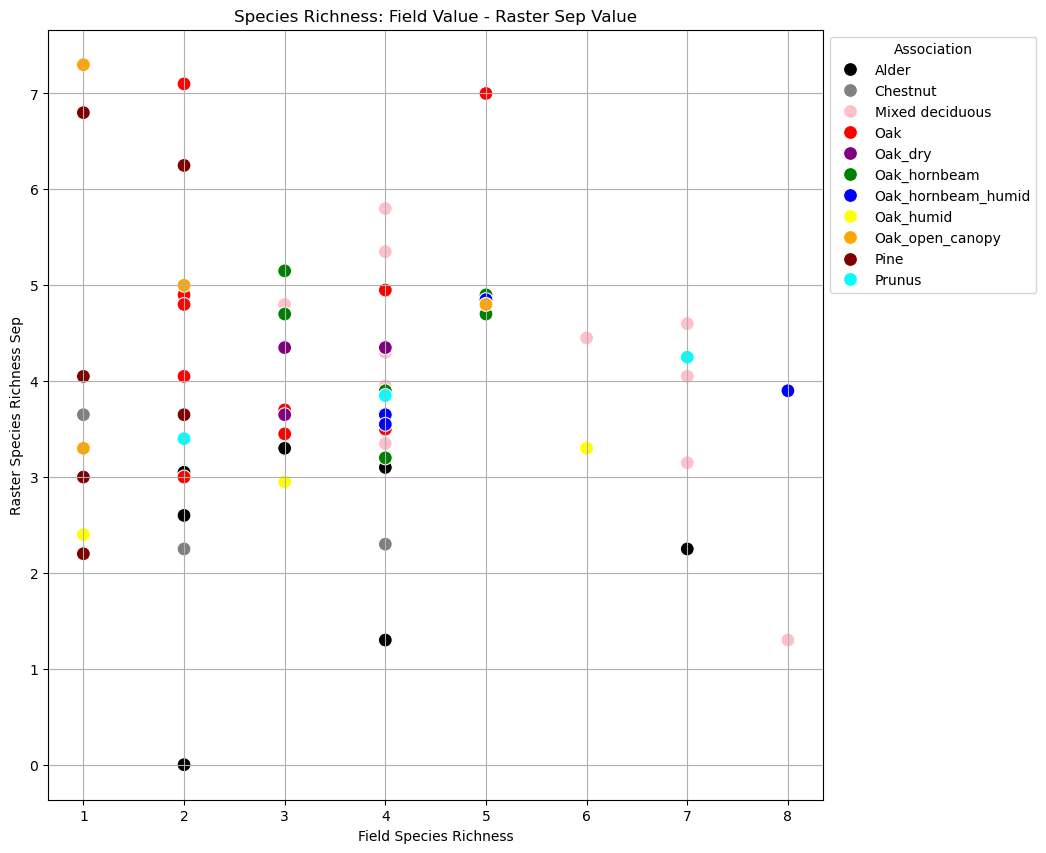

In [99]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [100]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-0.7567387785537155
0.4506895653363323
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to -0.19826668242712814; the p value is 0.12558978982553112
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [101]:
r2_score(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])

-1.1134136167922493

In [102]:
mae(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness June'])

2.0877049180327867

In [103]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-1.7301019341214026
0.08618301518554823
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to -0.12868467677234185; the p value is 0.3229645572182941
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [104]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-0.737644938198941

In [105]:
mae(df_Richness_1_Asso_NoZero['Field Species Richness'], df_Richness_1_Asso_NoZero['Raster Species Richness Sep'])

1.8598360655737705

## Shannon

In [106]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [107]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [108]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,0.568426,0.935210
59,FOR79,1.344339,Mixed deciduous,1.174565,1.207396
60,FOR80,0.918320,Mixed deciduous,0.877943,1.297885
61,FOR81,1.301362,Mixed deciduous,1.038922,1.304865
62,FOR82,1.193337,Mixed deciduous,0.943703,1.025488


In [109]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.848154,1.615426
30,FOR31,0.146145,Pine,0.964050,1.445004
58,FOR78,0.286836,Prunus,0.568426,0.935210
2,FOR03,0.534923,Prunus,0.000000,1.166316
1,FOR02,1.604816,Prunus,0.000000,1.164679


In [110]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,0.938792,1.029072
std,0.519653,0.433848,0.353681
min,0.000000,0.000000,0.000000
25%,0.401475,0.593762,0.844809
50%,0.804448,0.901837,1.025488
75%,1.180566,1.248307,1.220997
max,1.794190,2.008268,1.755974


In [111]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,0.374832,0.833307
19,FOR20,0.886464,Alder,1.082472,0.989999
35,FOR55,0.276191,Alder,0.561629,0.788668
7,FOR08,0.804448,Alder,0.876262,0.207944
36,FOR56,0.482578,Alder,0.300079,0.000000


In [112]:
df_Shannon_1_Asso_NoZero.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,55.000000,55.000000,55.000000
mean,0.909458,0.916606,1.033243
std,0.450632,0.412269,0.340575
min,0.146145,0.000000,0.000000
25%,0.526555,0.593762,0.871050
50%,0.908062,0.901837,1.030699
75%,1.257899,1.248307,1.220997
max,1.794190,1.917824,1.755974


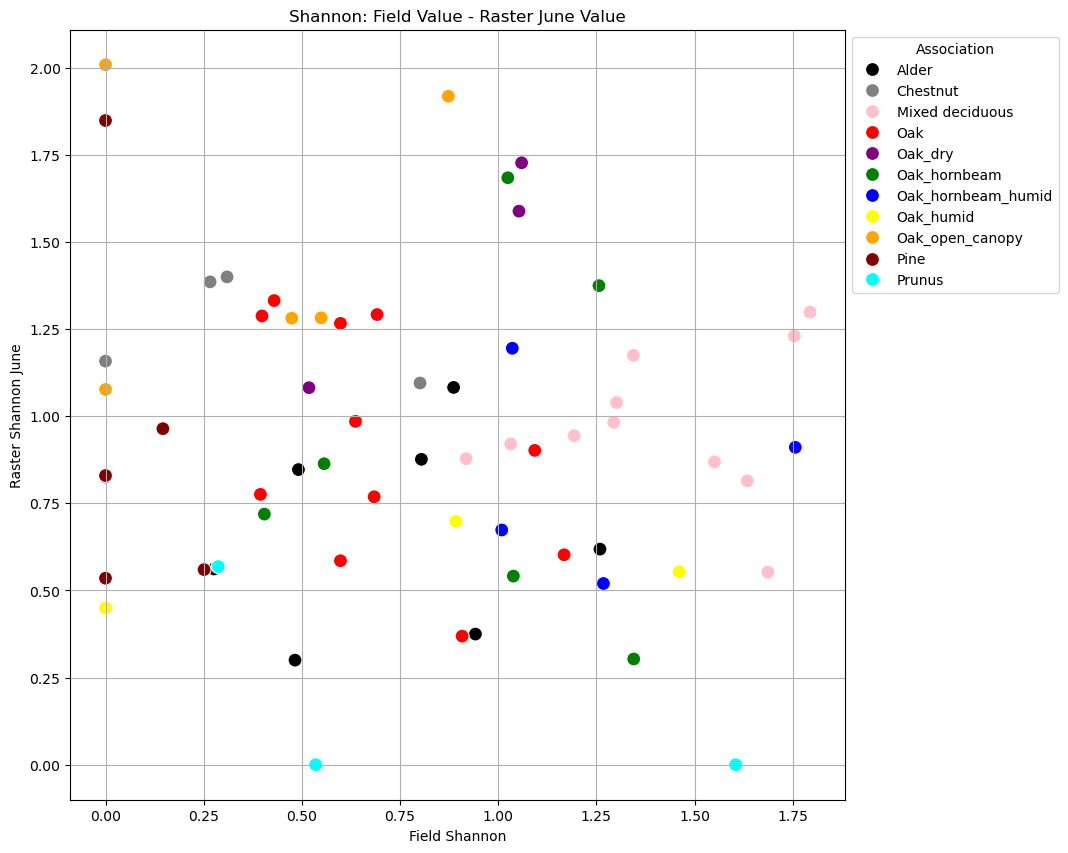

In [113]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [114]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-0.0867898310466749
0.9309992786842398
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to -0.061097532110571; the p value is 0.6576801313790154
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [115]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-0.9817352644115342

In [116]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.5959102003404354

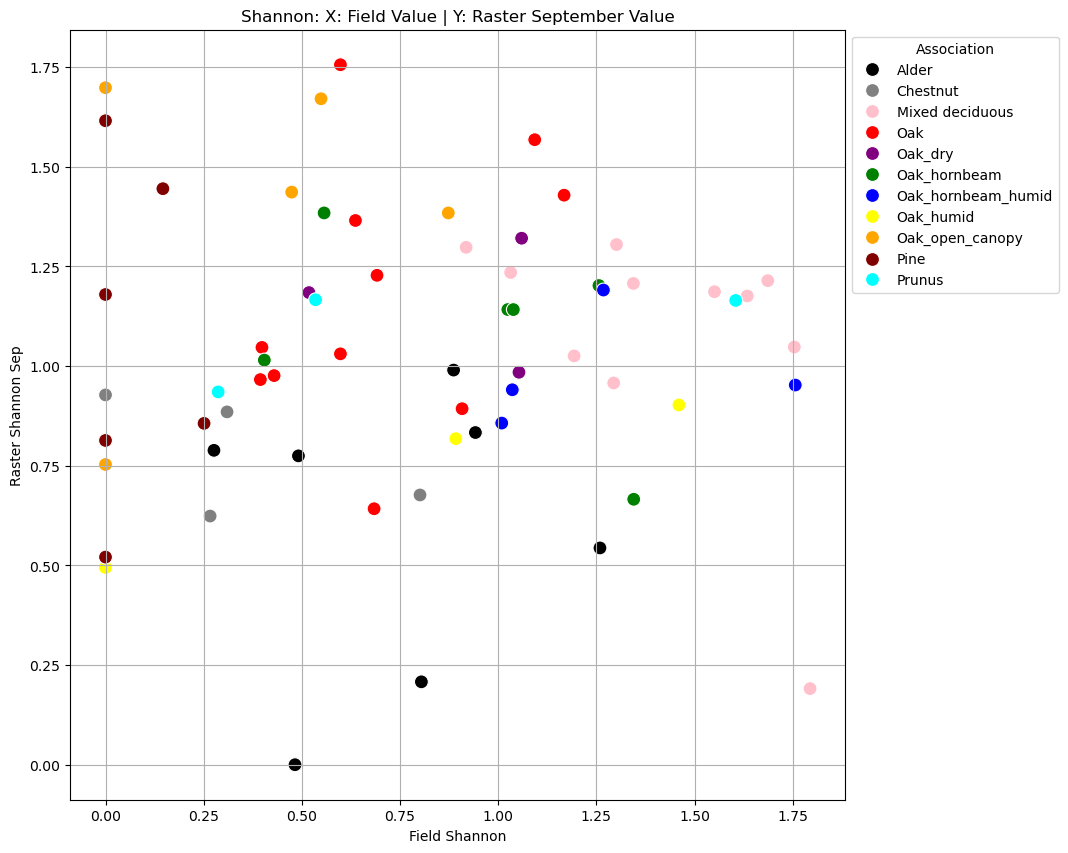

In [117]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [118]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso_NoZero['Field Shannon'], df_Shannon_1_Asso_NoZero['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-1.6252235070914778
0.10702973065549427
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to -0.006813961324862446; the p value is 0.9606216195028424
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [119]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.6530334536773839

In [120]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.5313896832677589